In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [20]:
test_id= test['Customer ID']

In [21]:
pd.options.display.float_format = '{:,.2f}'.format

In [22]:
train.sample(5)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
486,ADF0626,238.00,7.93,707.64,22.45,210.00,"85,675.60",75.00,"3,786.00","11,692.00",1.00,3G,3G,ToCall,ToCall,1.00
333,ADF0111,818.00,27.27,749.87,59.97,5.00,"922,078.91",36.00,"3,378.00","24,381.00",1.00,3G,3G,Zintel,Mango,1.00
574,ADF1240,133.00,4.43,643.59,40.88,3.75,"371,358.84",69.00,"9,096.00","11,546.00",2.00,3G,3G,Zintel,Uxaa,0.00
87,ADF0545,"1,310.00",43.67,982.21,59.84,50.00,"1,163,532.41",52.00,"4,770.00","14,055.00",1.00,2G,2G,Mango,PQza,1.00
152,ADF1242,"1,856.00",61.87,646.13,3.50,67.50,"95,443.88",73.00,"13,961.00","1,039.00",1.00,2G,2G,Uxaa,Uxaa,0.00


In [23]:
train.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
count,"1,400.00","1,400.00","1,400.00","1,400.00","1,400.00","1,400.00","1,400.00","1,400.00","1,400.00","1,400.00","1,400.00"
mean,"1,450.63",48.35,805.64,30.39,58.48,"2,162,306.93",202.42,"6,814.39","15,730.42",1.92,0.50
std,"1,276.01",42.53,"1,251.74",60.89,289.61,"6,865,958.48",302.04,"16,707.78","37,448.94",2.35,0.50
min,-5.00,-0.17,4.91,0.00,0.00,0.06,1.00,0.00,0.00,1.00,0.00
25%,287.00,9.57,155.54,2.62,1.25,"1,384.35",18.00,60.00,"1,123.00",1.00,0.00
50%,"1,171.00",39.03,606.58,13.71,11.25,"119,348.67",81.50,"1,617.00","4,171.00",1.00,0.50
75%,"2,242.00",74.73,"1,018.40",31.20,42.81,"1,206,784.53",254.25,"7,177.75","13,151.50",2.00,1.00
max,"5,451.00",181.70,"24,438.83",873.98,"8,295.00","99,456,402.05","2,596.00","381,174.00","431,440.00",49.00,1.00


In [24]:
train['Network type subscription in Month 1'].value_counts()

3G       636
2G       304
Other    285
Name: Network type subscription in Month 1, dtype: int64

In [25]:
train.isnull().any().value_counts()

True    16
dtype: int64

In [26]:
sample = pd.read_csv('sample submission.csv')

In [27]:
sample.sample(
)

,Customer ID,Churn Status
78,ADF0180,0


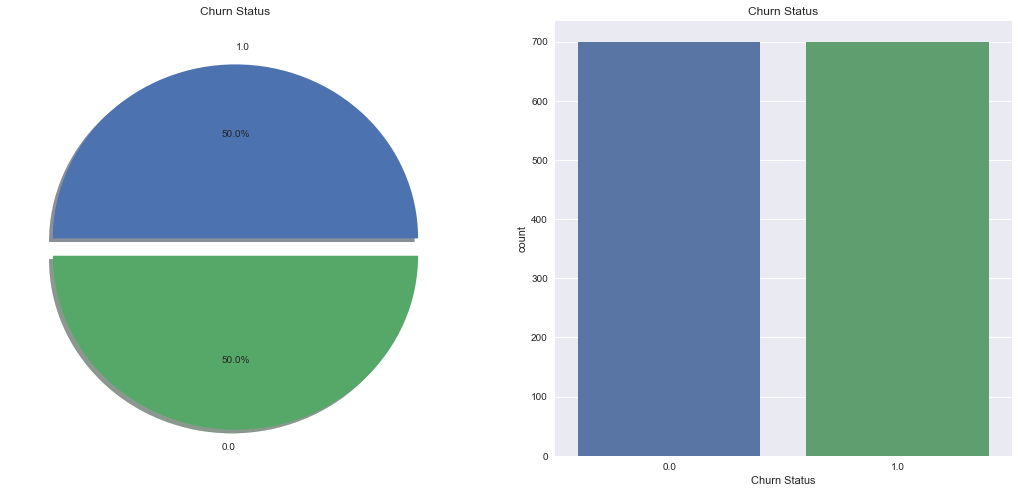

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Churn Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn Status')
ax[0].set_ylabel('')
sns.countplot('Churn Status',data=train, ax=ax[1])
ax[1].set_title('Churn Status')
plt.show()

In [29]:
train.groupby(['Network type subscription in Month 1','Churn Status'])['Churn Status'].count().to_frame()

Churn Status
Network type subscription in Month 1 Churn Status              
2G                                   0.00                   149
                                     1.00                   155
3G                                   0.00                   334
                                     1.00                   302
Other                                0.00                   119
                                     1.00                   166

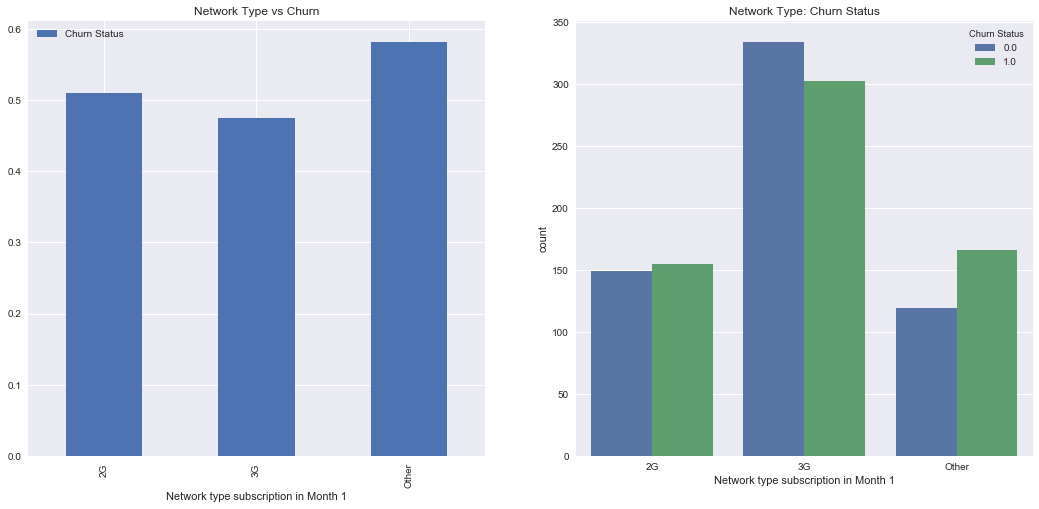

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Network type subscription in Month 1','Churn Status']].groupby(['Network type subscription in Month 1']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Network Type vs Churn')
sns.countplot('Network type subscription in Month 1',hue='Churn Status',data=train,ax=ax[1])
ax[1].set_title('Network Type: Churn Status')
plt.show()

In [31]:
train.groupby(['Network type subscription in Month 2','Churn Status'])['Churn Status'].count().to_frame()

Churn Status
Network type subscription in Month 2 Churn Status              
2G                                   0.00                   138
                                     1.00                   146
3G                                   0.00                   367
                                     1.00                   320
Other                                0.00                   119
                                     1.00                   166

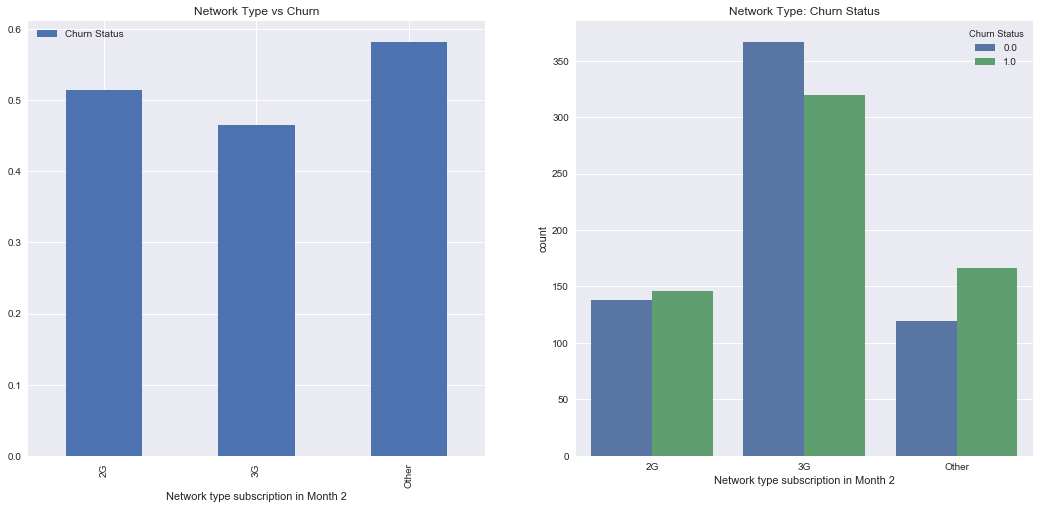

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Network type subscription in Month 2','Churn Status']].groupby(['Network type subscription in Month 2']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Network Type vs Churn')
sns.countplot('Network type subscription in Month 2',hue='Churn Status',data=train,ax=ax[1])
ax[1].set_title('Network Type: Churn Status')
plt.show()

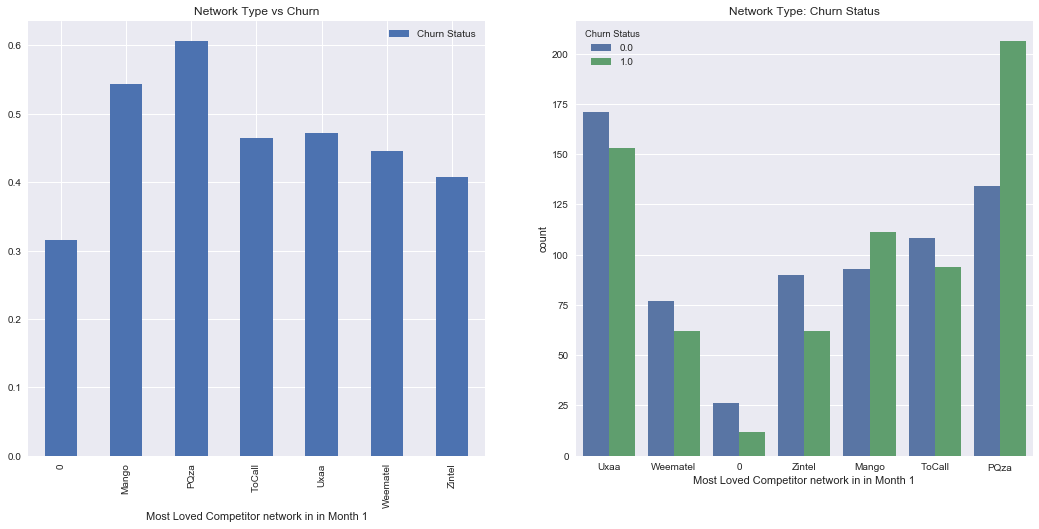

In [33]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Most Loved Competitor network in in Month 1','Churn Status']].groupby(['Most Loved Competitor network in in Month 1']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Network Type vs Churn')
sns.countplot('Most Loved Competitor network in in Month 1',hue='Churn Status',data=train,ax=ax[1])
ax[1].set_title('Network Type: Churn Status')
plt.show()

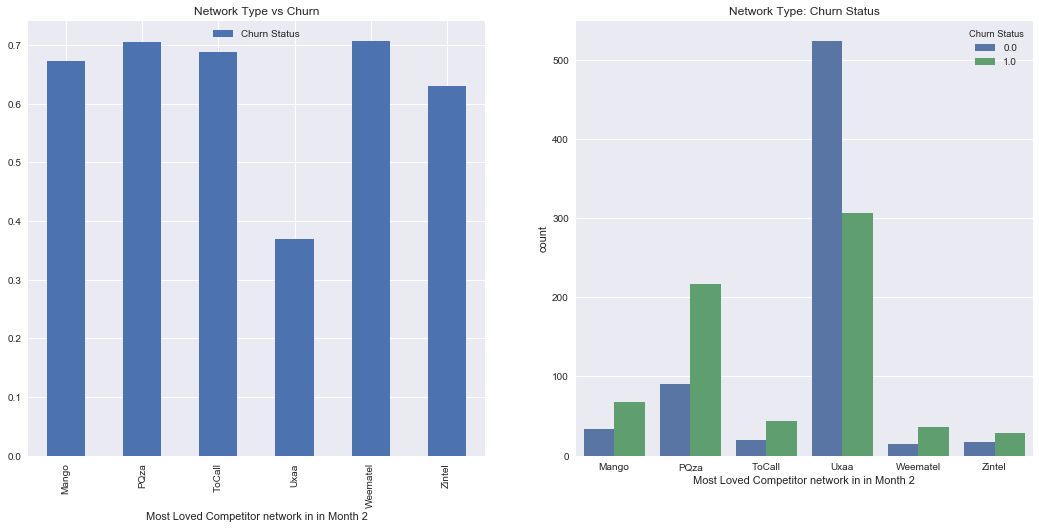

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Most Loved Competitor network in in Month 2','Churn Status']].groupby(['Most Loved Competitor network in in Month 2']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Network Type vs Churn')
sns.countplot('Most Loved Competitor network in in Month 2',hue='Churn Status',data=train,ax=ax[1])
ax[1].set_title('Network Type: Churn Status')
plt.show()

In [35]:
train.isnull().any()

Customer ID                                    True
network_age                                    True
Customer tenure in month                       True
Total Spend in Months 1 and 2 of 2017          True
Total SMS Spend                                True
Total Data Spend                               True
Total Data Consumption                         True
Total Unique Calls                             True
Total Onnet spend                              True
Total Offnet spend                             True
Total Call centre complaint calls              True
Network type subscription in Month 1           True
Network type subscription in Month 2           True
Most Loved Competitor network in in Month 1    True
Most Loved Competitor network in in Month 2    True
Churn Status                                   True
dtype: bool

In [36]:
train.columns = ['ID', 'Age_Days', 'Age_Month', 'Expenditure', 'Expenditure_SMS', 'Expenditure_Data', 'Data_Consumed', 'Unique_Calls',
                 'Onnet_Spend', 'Offnet_Spend', 'Call_Centre', 'Network_Type1', 'Network_Type2', 'Network_Love1', 'Network_Love2', 'Churn_Status']

In [37]:
train = train.drop(train.index[1400])

In [38]:
train['Network_Love1'].isnull().any()

True

In [39]:
#train['Network_Type1'].isnull().value_counts()

In [40]:
train['Network_Type1'].describe()

count     1225
unique       3
top         3G
freq       636
Name: Network_Type1, dtype: object

In [41]:
#train.loc[(train.Network_Type1.isnull()), 'Network_Type1'] = '3G'

In [42]:
train['Network_Type1'].isnull().any()

True

In [43]:
train['Network_Type2'].isnull().value_counts()

False    1256
True      144
Name: Network_Type2, dtype: int64

In [44]:
train['Network_Type2'].describe()

count     1256
unique       3
top         3G
freq       687
Name: Network_Type2, dtype: object

In [45]:
#train.loc[(train.Network_Type2.isnull()), 'Network_Type2'] = '3G'

In [46]:
train['Network_Love1'].isnull().any()

True

In [47]:
train['Network_Love1'].isnull().value_counts()

False    1399
True        1
Name: Network_Love1, dtype: int64

In [48]:
train['Network_Love1'].describe()

count     1399
unique       7
top       PQza
freq       340
Name: Network_Love1, dtype: object

In [49]:
#train.loc[(train.Network_Love1.isnull()), 'Network_Love1'] = 'PQza'

In [50]:
train['Network_Love1'].isnull().any()

True

In [51]:
train['Network_Love2'].isnull().any()

True

In [52]:
train['Network_Love2'].isnull().value_counts()

False    1399
True        1
Name: Network_Love2, dtype: int64

In [53]:
train['Network_Love2'].describe()

count     1399
unique       6
top       Uxaa
freq       829
Name: Network_Love2, dtype: object

In [54]:
#train.loc[(train.Network_Love2.isnull()), 'Network_Love2'] = 'Uxaa'

In [55]:
train['Network_Love2'].isnull().any()

True

In [56]:
train.isnull().any()

ID                  False
Age_Days            False
Age_Month           False
Expenditure         False
Expenditure_SMS     False
Expenditure_Data    False
Data_Consumed       False
Unique_Calls        False
Onnet_Spend         False
Offnet_Spend        False
Call_Centre         False
Network_Type1        True
Network_Type2        True
Network_Love1        True
Network_Love2        True
Churn_Status        False
dtype: bool

In [57]:
#Feature engineering network type 1 and type 2
train.Network_Type1.value_counts()

3G       636
2G       304
Other    285
Name: Network_Type1, dtype: int64

In [58]:
train.loc[(train.Network_Type1)== '3G','Network_Type1'] = 0
train.loc[(train.Network_Type1)== '2G','Network_Type1'] = 1
train.loc[(train.Network_Type1)== 'Other','Network_Type1'] = 2

In [59]:
train.loc[(train.Network_Type2)== '3G','Network_Type2'] = 0
train.loc[(train.Network_Type2)== '2G','Network_Type2'] = 1
train.loc[(train.Network_Type2)== 'Other','Network_Type2'] = 2

In [60]:
train.Network_Love1.value_counts()

PQza        340
Uxaa        324
Mango       204
ToCall      202
Zintel      152
Weematel    139
0            38
Name: Network_Love1, dtype: int64

In [61]:
#feature engineering for network loved month 1
train.loc[(train.Network_Love1)== 'PQza','Network_Love1'] = 1
train.loc[(train.Network_Love1)== 'Uxaa','Network_Love1'] = 2
train.loc[(train.Network_Love1)== 'Mango','Network_Love1'] = 3
train.loc[(train.Network_Love1)== 'ToCall','Network_Love1'] = 4
train.loc[(train.Network_Love1)== 'Zintel','Network_Love1'] = 5
train.loc[(train.Network_Love1)== 'Weematel','Network_Love1'] = 6

In [62]:
#feature engineering for network loved month 2
train.loc[(train.Network_Love2)== 'PQza','Network_Love2'] = 1
train.loc[(train.Network_Love2)== 'Uxaa','Network_Love2'] = 2
train.loc[(train.Network_Love2)== 'Mango','Network_Love2'] = 3
train.loc[(train.Network_Love2)== 'ToCall','Network_Love2'] = 4
train.loc[(train.Network_Love2)== 'Zintel','Network_Love2'] = 5
train.loc[(train.Network_Love2)== 'Weematel','Network_Love2'] = 6

In [63]:
train.sample(20)

,ID,Age_Days,Age_Month,Expenditure,Expenditure_SMS,Expenditure_Data,Data_Consumed,Unique_Calls,Onnet_Spend,Offnet_Spend,Call_Centre,Network_Type1,Network_Type2,Network_Love1,Network_Love2,Churn_Status
499,ADF0643,"1,521.00",50.70,"3,792.35",71.80,21.25,782.75,647.00,"64,872.00","228,790.00",1.00,0,0,3,4,1.00
1190,ADF1729,"1,910.00",63.67,981.58,21.34,0.00,"1,209.36",343.00,228.00,"37,844.00",1.00,2,2,4,2,1.00
599,ADF1295,134.00,4.47,812.50,73.68,8.75,"663,969.13",554.00,"27,228.00",765.00,1.00,0,0,5,2,0.00
1102,ADF1272,"2,193.00",73.10,725.70,7.00,22.50,"272,916.89",228.00,"7,761.00","9,972.00",1.00,2,2,4,2,0.00
377,ADF0314,"1,845.00",61.50,476.44,19.85,0.00,"86,713.40",5.00,490.00,179.00,1.00,0,0,1,1,0.00
958,ADF0104,"1,217.00",40.57,642.81,40.00,10.00,409.29,103.00,"1,762.00","25,464.00",4.00,2,2,6,3,1.00
81,ADF0508,112.00,3.73,195.37,0.00,2.50,"1,015,036.08",13.00,0.00,"2,268.00",2.00,1,1,4,1,1.00
336,ADF0117,"2,585.00",86.17,897.28,19.59,137.50,"2,229,748.69",105.00,"16,902.00","10,540.00",1.00,0,0,3,3,1.00
872,ADF1834,"4,236.00",141.20,"2,567.95",16.73,7.50,"813,623.88",624.00,0.00,"100,260.00",1.00,0,0,2,2,1.00
609,ADF1314,"1,056.00",35.20,847.17,25.24,23.75,274.07,415.00,"14,788.00","19,779.00",7.00,0,0,6,2,0.00


In [64]:
train = train.drop('ID', 1)
train= train.drop('Age_Days', 1)

In [65]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# def encode(column, df):
#     labelencoder_X = LabelEncoder()
#     column = labelencoder_X.fit_transform(column)
#     onehotencoder = OneHotEncoder(categorical_features = 'all')
#     df = onehotencoder.fit_transform(df).toarray()

In [66]:
# making our matrix and vector
X_train = train.iloc[:, :-1].values #matrix (independent features)

y_train = train.iloc[:, 13].values #vector (dependent feature)

In [67]:
#filling NAN VALUES

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [68]:
#from sklearn.preprocessing import OneHotEncoder

In [69]:
test


,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
0,ADF0001,1012,33.73,"1,560.12",14.04,226.30,"3,126,093.30",64,14503,12402,1,3G,3G,Weematel,Mango
1,ADF0002,137,4.57,"1,705.84",73.63,5.00,162.88,515,29832,88953,9,3G,3G,ToCall,Mango
2,ADF0003,202,6.73,"1,720.30",4.36,245.00,"3,334,606.97",163,228,1495,1,3G,3G,ToCall,Mango
3,ADF0004,165,5.50,"1,732.28",0.00,12.50,"668,292.39",484,0,71928,2,3G,3G,Uxaa,Mango
4,ADF0005,759,25.30,"1,873.06",69.57,412.50,"6,666,974.78",64,7616,20753,2,3G,3G,Mango,Mango
5,ADF0006,129,4.30,"1,877.26",46.11,343.75,"3,387,698.23",121,0,20944,1,3G,3G,PQza,Mango
6,ADF0007,148,4.93,"2,388.82",17.99,1.25,"129,167.68",830,0,93461,1,NaN,3G,0,Mango
7,ADF0008,1144,38.13,"2,702.35",47.84,48.75,"3,390.06",431,60102,131525,1,3G,3G,Mango,Mango
8,ADF0009,137,4.57,"2,782.56",179.52,315.00,"3,632,010.69",622,0,40724,2,3G,3G,Weematel,Mango
9,ADF0010,1456,48.53,"2,934.70",200.37,108.75,"40,638.89",892,16572,150693,1,Other,Other,PQza,Mango


In [70]:
''''onehotencoder = OneHotEncoder(categorical_features=[1])
X_train = onehotencoder.fit_transform(X_train).toarray()'''

"'onehotencoder = OneHotEncoder(categorical_features=[1])\nX_train = onehotencoder.fit_transform(X_train).toarray()"

In [71]:
#X_train = X_train[:, 1:]

In [72]:
test.isnull().any()

Customer ID                                    False
network_age                                    False
Customer tenure in month                       False
Total Spend in Months 1 and 2 of 2017          False
Total SMS Spend                                False
Total Data Spend                               False
Total Data Consumption                         False
Total Unique Calls                             False
Total Onnet spend                              False
Total Offnet spend                             False
Total Call centre complaint calls              False
Network type subscription in Month 1            True
Network type subscription in Month 2            True
Most Loved Competitor network in in Month 1    False
Most Loved Competitor network in in Month 2    False
dtype: bool

In [73]:
test.columns = ['ID', 'Age_Days', 'Age_Month', 'Expenditure', 'Expenditure_SMS', 'Expenditure_Data', 'Data_Consumed', 'Unique_Calls',
                 'Onnet_Spend', 'Offnet_Spend', 'Call_Centre', 'Network_Type1', 'Network_Type2', 'Network_Love1', 'Network_Love2']

In [74]:
test = test.drop('ID', 1)
test = test.drop('Age_Days', 1)

In [75]:
test['Network_Type1'].isnull().value_counts()

False    530
True      70
Name: Network_Type1, dtype: int64

In [76]:
test['Network_Type1'].describe(
)

count     530
unique      3
top        3G
freq      338
Name: Network_Type1, dtype: object

In [77]:
'''test.loc[(test.Network_Type1.isnull()), 'Network_Type1'] = '3G'
test.loc[(test.Network_Type2.isnull()), 'Network_Type2'] = '3G'''

"test.loc[(test.Network_Type1.isnull()), 'Network_Type1'] = '3G'\ntest.loc[(test.Network_Type2.isnull()), 'Network_Type2'] = '3G"

In [78]:
test['Network_Type2'].describe()

count     538
unique      3
top        3G
freq      351
Name: Network_Type2, dtype: object

In [79]:
#feature engineering for network type in test
test.loc[(test.Network_Type1)== '3G','Network_Type1'] = 0
test.loc[(test.Network_Type1)== '2G','Network_Type1'] = 1
test.loc[(test.Network_Type1)== 'Other','Network_Type1'] = 2

In [80]:
#feature engineering for network type in test
test.loc[(test.Network_Type2)== '3G','Network_Type2'] = 0
test.loc[(test.Network_Type2)== '2G','Network_Type2'] = 1
test.loc[(test.Network_Type2)== 'Other','Network_Type2'] = 2

In [81]:
#feature engineering for network loved month 1
test.loc[(test.Network_Love1)== 'PQza','Network_Love1'] = 1
test.loc[(test.Network_Love1)== 'Uxaa','Network_Love1'] = 2
test.loc[(test.Network_Love1)== 'Mango','Network_Love1'] = 3
test.loc[(test.Network_Love1)== 'ToCall','Network_Love1'] = 4
test.loc[(test.Network_Love1)== 'Zintel','Network_Love1'] = 5
test.loc[(test.Network_Love1)== 'Weematel','Network_Love1'] = 6

In [82]:
#feature engineering for network loved month 2
test.loc[(test.Network_Love2)== 'PQza','Network_Love2'] = 1
test.loc[(test.Network_Love2)== 'Uxaa','Network_Love2'] = 2
test.loc[(test.Network_Love2)== 'Mango','Network_Love2'] = 3
test.loc[(test.Network_Love2)== 'ToCall','Network_Love2'] = 4
test.loc[(test.Network_Love2)== 'Zintel','Network_Love2'] = 5
test.loc[(test.Network_Love2)== 'Weematel','Network_Love2'] = 6

In [83]:
testputter = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
testputter= testputter.fit(test)
test = testputter.transform(test)

In [84]:
# test = onehotencoder.fit_transform(test).toarray()
# test = test[:, 1:]

In [85]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
test = sc_X.transform(test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [86]:
train['Network_Type1'].describe()

count     1225
unique       3
top          0
freq       636
Name: Network_Type1, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_train[:, 9] = labelencoder_X.fit_transform(X_train[:, 9])
onehotencoder = OneHotEncoder(categorical_features = [9])
X = onehotencoder.fit_transform(X_train).toarray()

In [88]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# X_train[:,] = labelencoder_X.fit_transform(X_train[:, 9])
# onehotencoder = OneHotEncoder(categorical_features = [9])
# X = onehotencoder.fit_transform(X_train).toarray()

In [97]:
# import numpy.statsmodel.formula.api as sm
# X_train = np.append((1400, 1).astype(int), values = train)

In [98]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

In [99]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDR', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreeClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [100]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=7)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.578571 (0.079668)
KNN: 0.508571 (0.114277)
LDR: 0.567143 (0.077341)
CART: 0.663571 (0.202168)
ETC: 0.505000 (0.108093)
GBC: 0.732143 (0.146533)
RFC: 0.700000 (0.124499)
NB: 0.522143 (0.147408)
SVM: 0.589286 (0.124796)


In [101]:
# for column in test.columns:
#     test[column] = test[column].apply(lambda a: int(a))

In [102]:
test

array([[-0.34387853,  0.60295447, -0.26870501, ..., -0.87605696,
         1.84355141,  0.70723013],
       [-1.02985697,  0.71941078,  0.7103736 , ..., -0.87605696,
         0.66908491,  0.70723013],
       [-0.97889857,  0.73097001, -0.42774983, ..., -0.87605696,
         0.66908491,  0.70723013],
       ..., 
       [-0.81504772, -0.25342972, -0.02816614, ..., -0.87605696,
         0.66908491,  2.44915787],
       [-0.5006736 , -0.24963078, -0.06743444, ...,  0.41238278,
        -1.09261483,  2.44915787],
       [-0.70685912, -0.24528776, -0.17899584, ...,  0.41238278,
         1.25631816,  2.44915787]])

In [143]:
#GBF
clf= GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [144]:
testputter = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
testputter= testputter.fit(test)
test = testputter.transform(test)

In [145]:
prediction= clf.predict(test)

In [146]:
score = clf.score(X_train, y_train)
print("Accuracy: ", score)

Accuracy:  0.909285714286


In [147]:
predict_frame = pd.DataFrame(prediction, columns=['Churn_Status']) 

In [149]:
result = pd.concat([test_id, predict_frame[['Churn_Status']]], axis=1)


In [150]:
result.columns = ['Customer ID', 'Churn Status']

In [153]:
result.loc[result['Churn Status']==-1, 'Churn Status']= 0

In [157]:
result['Churn Status'] = result['Churn Status'].apply(lambda x: int(x))

In [158]:
pd.options.display.float_format = '{:,.0f}'.format

In [132]:
result.sample()

,Customer ID,Churn Status
292,ADF0766,1


In [133]:
sample.sample()

,Customer ID,Churn Status
589,ADF1943,0


In [159]:
result.to_csv('resultGBF.csv', index=False)

-1    303
1     297
Name: Churn Status, dtype: int64

In [131]:
result.sample()

,Customer ID,Churn Status
284,ADF0758,1


In [116]:
#import pandas as pd

In [117]:
#result_new =pd.read_csv('resultFEB20.csv')

In [118]:
#result_new.info()

In [119]:
#result_new['Churn Status'].value_counts()

In [120]:
#result_new.loc[result_new['Churn Status']==-1, 'Churn Status']= 0

In [121]:
#result_new['Churn Status'] = result_new['Churn Status'].apply(lambda x: int(x))

In [122]:
#result_new.head()

In [123]:
#result_new.to_csv('resultFEB20_1.csv', index=False)

In [126]:
KNN= KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [127]:
prediction_KNN= KNN.predict(test)


In [128]:
score_KNN = KNN.score(X_train, y_train)
print("Accuracy: ", score)

Accuracy:  0.995


In [130]:
prediction_KNN

array([-1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1

In [134]:
predict_KNN_frame = pd.DataFrame(prediction_KNN, columns=['Churn_Status']) 

In [135]:

result_KNN= pd.concat([test_id, predict_KNN_frame[['Churn_Status']]], axis=1)

In [136]:

result_KNN.columns = ['Customer ID', 'Churn Status']

In [137]:
result_KNN.head()

,Customer ID,Churn Status
0,ADF0001,-1
1,ADF0002,1
2,ADF0003,1
3,ADF0004,1
4,ADF0005,-1


In [138]:
result_KNN.loc[result_KNN['Churn Status']==-1, 'Churn Status']= 0

In [141]:
result_KNN['Churn Status'] = result_KNN['Churn Status'].apply(lambda x: int(x))

In [142]:
result_KNN.to_csv('result_KNN.csv', index = False)

In [160]:
#using Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=30)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [164]:
prediction_RFC = RFC.predict(test)
probs_RFC = RFC.predict_proba(test)
probs_RFC

array([[ 0.36666667,  0.63333333],
       [ 0.06666667,  0.93333333],
       [ 0.2       ,  0.8       ],
       ..., 
       [ 0.7       ,  0.3       ],
       [ 0.6       ,  0.4       ],
       [ 0.83333333,  0.16666667]])

In [165]:
score_RFC = RFC.score(X_train, y_train)
print("Accuracy: ", score_RFC)

Accuracy:  0.999285714286


In [167]:
predict_RFC_frame = pd.DataFrame(prediction_RFC, columns=['Churn_Status']) 
result_RFC= pd.concat([test_id, predict_RFC_frame[['Churn_Status']]], axis=1)
result_RFC.columns = ['Customer ID', 'Churn Status']
result_RFC.head()

,Customer ID,Churn Status
0,ADF0001,1
1,ADF0002,1
2,ADF0003,1
3,ADF0004,1
4,ADF0005,1


In [168]:
result_RFC.loc[result_RFC['Churn Status']==-1, 'Churn Status']= 0
result_RFC['Churn Status'] = result_RFC['Churn Status'].apply(lambda x: int(x))
result_RFC.to_csv('result_RFC.csv', index = False)